I'm cheating here and just side-stepping the big data database thing right now because I need to work on actually getting the sentiment analysis and time series working and this computer doesn't have mongdodb or spark installed. So I'm doing it in reverse, just to get things working.

In [1]:
import os
import glob
import json

In [2]:
#path = os.getcwd() + '/*.json'
path = '*.json'
files = glob.glob(path)
files

['key_tweets_2021-11.json',
 'key_tweets_2021-12.json',
 'key_tweets_2022-01.json',
 'key_tweets_2022-02.json',
 'key_tweets_2022-03.json',
 'key_tweets_2022-04.json',
 'key_tweets_2022-05.json',
 'key_tweets_2022-06.json',
 'key_tweets_2022-07.json',
 'key_tweets_2022-08.json',
 'key_tweets_2022-09.json',
 'key_tweets_2022-10.json',
 'key_tweets_2022-11.json']

In [3]:
files[0]

'key_tweets_2021-11.json'

In [4]:
import pandas as pd

In [5]:
pd.read_json(files[0], lines=True)

,0
0,{'created_at': 'Mon Nov 01 02:02:27 +0000 2021...
1,{'created_at': 'Mon Nov 01 03:19:41 +0000 2021...
2,{'created_at': 'Mon Nov 01 03:19:49 +0000 2021...
3,{'created_at': 'Mon Nov 01 03:19:50 +0000 2021...
4,{'created_at': 'Mon Nov 01 03:20:34 +0000 2021...
...,...
521,{'created_at': 'Tue Nov 30 21:40:10 +0000 2021...
522,{'created_at': 'Tue Nov 30 23:18:44 +0000 2021...
523,{'created_at': 'Tue Nov 30 23:20:39 +0000 2021...
524,{'created_at': 'Tue Nov 30 23:27:09 +0000 2021...


In [6]:
pd.json_normalize(files[0], max_level=1)

NotImplementedError: 

In [7]:
tweets = []
with open(files[0],'r', encoding="utf8") as f:
    for line in f:
        tweets.append(json.loads(line))

In [8]:
df = pd.json_normalize([json.loads(x) for x in open(files[0]).readlines()])

In [9]:
df

,0
0,{'created_at': 'Mon Nov 01 02:02:27 +0000 2021...
1,{'created_at': 'Mon Nov 01 03:19:41 +0000 2021...
2,{'created_at': 'Mon Nov 01 03:19:49 +0000 2021...
3,{'created_at': 'Mon Nov 01 03:19:50 +0000 2021...
4,{'created_at': 'Mon Nov 01 03:20:34 +0000 2021...
...,...
521,{'created_at': 'Tue Nov 30 21:40:10 +0000 2021...
522,{'created_at': 'Tue Nov 30 23:18:44 +0000 2021...
523,{'created_at': 'Tue Nov 30 23:20:39 +0000 2021...
524,{'created_at': 'Tue Nov 30 23:27:09 +0000 2021...


In [10]:
df[0].iloc[0]

{'created_at': 'Mon Nov 01 02:02:27 +0000 2021',
 'text': '@mishacollins',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 '\n            "user": {\n                "id": tweet_user_id,\n                "name": tweet_user_name,\n                "location": tweet_user_location,\n                "url": tweet_user_url,\n                "description": tweet_user_description,\n                "verified": tweet_user_verified,\n                "followers_count": tweet_user_follower_count,\n                "friends_count": tweet_user_friends_count,\n                "favourites_count": tweet_user_favourites_count,\n                "statuses_count": tweet_user_statuses_count,\n                "created_at": tweet_user_created_at,\n                "utc_offset": tweet_user_utc_offset,\n                "time_zone": tweet_user_timezone,\n                "geo_enabled": tweet_user_geo_enabled,\n                "lang": tweet_user_language,\n           

In [11]:
json.dumps(df[0].iloc[0])

'{"created_at": "Mon Nov 01 02:02:27 +0000 2021", "text": "@mishacollins", "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "\\n            \\"user\\": {\\n                \\"id\\": tweet_user_id,\\n                \\"name\\": tweet_user_name,\\n                \\"location\\": tweet_user_location,\\n                \\"url\\": tweet_user_url,\\n                \\"description\\": tweet_user_description,\\n                \\"verified\\": tweet_user_verified,\\n                \\"followers_count\\": tweet_user_follower_count,\\n                \\"friends_count\\": tweet_user_friends_count,\\n                \\"favourites_count\\": tweet_user_favourites_count,\\n                \\"statuses_count\\": tweet_user_statuses_count,\\n                \\"created_at\\": tweet_user_created_at,\\n                \\"utc_offset\\": tweet_user_utc_offset,\\n                \\"time_zone\\": tweet_user_timezone,\\n                \\"geo_enabled\\": t

In [12]:
pd.DataFrame.from_dict(tweets)

,0
0,{'created_at': 'Mon Nov 01 02:02:27 +0000 2021...
1,{'created_at': 'Mon Nov 01 03:19:41 +0000 2021...
2,{'created_at': 'Mon Nov 01 03:19:49 +0000 2021...
3,{'created_at': 'Mon Nov 01 03:19:50 +0000 2021...
4,{'created_at': 'Mon Nov 01 03:20:34 +0000 2021...
...,...
521,{'created_at': 'Tue Nov 30 21:40:10 +0000 2021...
522,{'created_at': 'Tue Nov 30 23:18:44 +0000 2021...
523,{'created_at': 'Tue Nov 30 23:20:39 +0000 2021...
524,{'created_at': 'Tue Nov 30 23:27:09 +0000 2021...


In [13]:
for tweet in tweets:
    print(tweet[0])

{'created_at': 'Mon Nov 01 02:02:27 +0000 2021', 'text': '@mishacollins', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', '\n            "user": {\n                "id": tweet_user_id,\n                "name": tweet_user_name,\n                "location": tweet_user_location,\n                "url": tweet_user_url,\n                "description": tweet_user_description,\n                "verified": tweet_user_verified,\n                "followers_count": tweet_user_follower_count,\n                "friends_count": tweet_user_friends_count,\n                "favourites_count": tweet_user_favourites_count,\n                "statuses_count": tweet_user_statuses_count,\n                "created_at": tweet_user_created_at,\n                "utc_offset": tweet_user_utc_offset,\n                "time_zone": tweet_user_timezone,\n                "geo_enabled": tweet_user_geo_enabled,\n                "lang": tweet_user_language,\n              

df = pd.read_json('file.json', lines = True)
df = (pd.DataFrame(df['aspect'].values.tolist()).add_prefix('aspect.').join(df.drop('aspect', 1)))

In [14]:
pd.DataFrame.from_dict(tweet)

,created_at,text,source,"\n ""user"": {\n ""id"": tweet_user_id,\n ""name"": tweet_user_name,\n ""location"": tweet_user_location,\n ""url"": tweet_user_url,\n ""description"": tweet_user_description,\n ""verified"": tweet_user_verified,\n ""followers_count"": tweet_user_follower_count,\n ""friends_count"": tweet_user_friends_count,\n ""favourites_count"": tweet_user_favourites_count,\n ""statuses_count"": tweet_user_statuses_count,\n ""created_at"": tweet_user_created_at,\n ""utc_offset"": tweet_user_utc_offset,\n ""time_zone"": tweet_user_timezone,\n ""geo_enabled"": tweet_user_geo_enabled,\n ""lang"": tweet_user_language,\n },\n lang",timestamp_ms
0,Tue Nov 30 23:37:22 +0000 2021,RT @mishacollins: I know it’s late in the day ...,"<a href=""http://twitter.com/download/android"" ...",en,1638315442665


In [15]:
df = pd.read_json(files[0], lines=True)
(pd.DataFrame(df[0].values.tolist()).join(df.drop(0, 1)))

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\2211459617.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  (pd.DataFrame(df[0].values.tolist()).join(df.drop(0, 1)))


,created_at,text,source,"\n ""user"": {\n ""id"": tweet_user_id,\n ""name"": tweet_user_name,\n ""location"": tweet_user_location,\n ""url"": tweet_user_url,\n ""description"": tweet_user_description,\n ""verified"": tweet_user_verified,\n ""followers_count"": tweet_user_follower_count,\n ""friends_count"": tweet_user_friends_count,\n ""favourites_count"": tweet_user_favourites_count,\n ""statuses_count"": tweet_user_statuses_count,\n ""created_at"": tweet_user_created_at,\n ""utc_offset"": tweet_user_utc_offset,\n ""time_zone"": tweet_user_timezone,\n ""geo_enabled"": tweet_user_geo_enabled,\n ""lang"": tweet_user_language,\n },\n lang",timestamp_ms
0,Mon Nov 01 02:02:27 +0000 2021,@mishacollins,"<a href=""http://twitter.com/download/android"" ...",und,1635732147661
1,Mon Nov 01 03:19:41 +0000 2021,@mishacollins @vic_righthand SIR,"<a href=""http://twitter.com/download/iphone"" r...",und,1635736781657
2,Mon Nov 01 03:19:49 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,"<a href=""http://twitter.com/download/iphone"" r...",en,1635736789661
3,Mon Nov 01 03:19:50 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,"<a href=""http://twitter.com/download/android"" ...",en,1635736790663
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,"<a href=""http://twitter.com/download/iphone"" r...",en,1635736834658
...,...,...,...,...,...
521,Tue Nov 30 21:40:10 +0000 2021,"RT @CreationEnt: Jensen Ackles, Jared Padaleck...","<a href=""https://mobile.twitter.com"" rel=""nofo...",en,1638308410664
522,Tue Nov 30 23:18:44 +0000 2021,RT @mishacollins: I know it’s late in the day ...,"<a href=""http://twitter.com/download/android"" ...",en,1638314324659
523,Tue Nov 30 23:20:39 +0000 2021,RT @mishacollins: I know it’s late in the day ...,"<a href=""http://twitter.com/download/android"" ...",en,1638314439658
524,Tue Nov 30 23:27:09 +0000 2021,@mishacollins i love you king,"<a href=""http://twitter.com/download/iphone"" r...",en,1638314829661


In [18]:
df_list = []
for file in files:
    df_list.append(pd.read_json(file, lines=True))

In [19]:
df_list

[                                                     0
 0    {'created_at': 'Mon Nov 01 02:02:27 +0000 2021...
 1    {'created_at': 'Mon Nov 01 03:19:41 +0000 2021...
 2    {'created_at': 'Mon Nov 01 03:19:49 +0000 2021...
 3    {'created_at': 'Mon Nov 01 03:19:50 +0000 2021...
 4    {'created_at': 'Mon Nov 01 03:20:34 +0000 2021...
 ..                                                 ...
 521  {'created_at': 'Tue Nov 30 21:40:10 +0000 2021...
 522  {'created_at': 'Tue Nov 30 23:18:44 +0000 2021...
 523  {'created_at': 'Tue Nov 30 23:20:39 +0000 2021...
 524  {'created_at': 'Tue Nov 30 23:27:09 +0000 2021...
 525  {'created_at': 'Tue Nov 30 23:37:22 +0000 2021...
 
 [526 rows x 1 columns],
                                                      0
 0    {'created_at': 'Wed Dec 01 00:41:09 +0000 2021...
 1    {'created_at': 'Wed Dec 01 04:00:35 +0000 2021...
 2    {'created_at': 'Wed Dec 01 04:26:05 +0000 2021...
 3    {'created_at': 'Wed Dec 01 12:00:05 +0000 2021...
 4    {'created_at': 

In [26]:
df = pd.concat(df_list, ignore_index=True)

In [27]:
df

,0
0,{'created_at': 'Mon Nov 01 02:02:27 +0000 2021...
1,{'created_at': 'Mon Nov 01 03:19:41 +0000 2021...
2,{'created_at': 'Mon Nov 01 03:19:49 +0000 2021...
3,{'created_at': 'Mon Nov 01 03:19:50 +0000 2021...
4,{'created_at': 'Mon Nov 01 03:20:34 +0000 2021...
...,...
8686,{'created_at': 'Tue Nov 22 16:25:31 +0000 2022...
8687,{'created_at': 'Tue Nov 22 17:22:47 +0000 2022...
8688,{'created_at': 'Tue Nov 22 18:02:34 +0000 2022...
8689,{'created_at': 'Tue Nov 22 20:01:11 +0000 2022...


In [64]:
df_tweets = pd.DataFrame(df[0].values.tolist()).join(df.drop(0, 1))

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\569452358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tweets = pd.DataFrame(df[0].values.tolist()).join(df.drop(0, 1))


In [65]:
df_tweets

,created_at,text,source,"\n ""user"": {\n ""id"": tweet_user_id,\n ""name"": tweet_user_name,\n ""location"": tweet_user_location,\n ""url"": tweet_user_url,\n ""description"": tweet_user_description,\n ""verified"": tweet_user_verified,\n ""followers_count"": tweet_user_follower_count,\n ""friends_count"": tweet_user_friends_count,\n ""favourites_count"": tweet_user_favourites_count,\n ""statuses_count"": tweet_user_statuses_count,\n ""created_at"": tweet_user_created_at,\n ""utc_offset"": tweet_user_utc_offset,\n ""time_zone"": tweet_user_timezone,\n ""geo_enabled"": tweet_user_geo_enabled,\n ""lang"": tweet_user_language,\n },\n lang",timestamp_ms
0,Mon Nov 01 02:02:27 +0000 2021,@mishacollins,"<a href=""http://twitter.com/download/android"" ...",und,1635732147661
1,Mon Nov 01 03:19:41 +0000 2021,@mishacollins @vic_righthand SIR,"<a href=""http://twitter.com/download/iphone"" r...",und,1635736781657
2,Mon Nov 01 03:19:49 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,"<a href=""http://twitter.com/download/iphone"" r...",en,1635736789661
3,Mon Nov 01 03:19:50 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,"<a href=""http://twitter.com/download/android"" ...",en,1635736790663
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,"<a href=""http://twitter.com/download/iphone"" r...",en,1635736834658
...,...,...,...,...,...
8686,Tue Nov 22 16:25:31 +0000 2022,RT @JensenPadaYU: Have a good night. Tomorrow ...,"<a href=""http://twitter.com/download/iphone"" r...",en,1669134331665
8687,Tue Nov 22 17:22:47 +0000 2022,RT @embersgrimm: a show about gay nuns is gett...,"<a href=""http://twitter.com/download/android"" ...",en,1669137767661
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,"<a href=""http://twitter.com/download/iphone"" r...",en,1669140154664
8689,Tue Nov 22 20:01:11 +0000 2022,"RT @kanstans: so far we got snooki, misha coll...","<a href=""http://twitter.com/download/iphone"" r...",en,1669147271664


In [66]:
df_tweets = df_tweets.drop('source', axis=1)

In [67]:
df_tweets.head()

,created_at,text,"\n ""user"": {\n ""id"": tweet_user_id,\n ""name"": tweet_user_name,\n ""location"": tweet_user_location,\n ""url"": tweet_user_url,\n ""description"": tweet_user_description,\n ""verified"": tweet_user_verified,\n ""followers_count"": tweet_user_follower_count,\n ""friends_count"": tweet_user_friends_count,\n ""favourites_count"": tweet_user_favourites_count,\n ""statuses_count"": tweet_user_statuses_count,\n ""created_at"": tweet_user_created_at,\n ""utc_offset"": tweet_user_utc_offset,\n ""time_zone"": tweet_user_timezone,\n ""geo_enabled"": tweet_user_geo_enabled,\n ""lang"": tweet_user_language,\n },\n lang",timestamp_ms
0,Mon Nov 01 02:02:27 +0000 2021,@mishacollins,und,1635732147661
1,Mon Nov 01 03:19:41 +0000 2021,@mishacollins @vic_righthand SIR,und,1635736781657
2,Mon Nov 01 03:19:49 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736789661
3,Mon Nov 01 03:19:50 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736790663
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658


In [68]:
df_tweets.rename(columns={df_tweets.columns[2]:'lang'}, inplace=True)

In [69]:
df_tweets.head()

,created_at,text,lang,timestamp_ms
0,Mon Nov 01 02:02:27 +0000 2021,@mishacollins,und,1635732147661
1,Mon Nov 01 03:19:41 +0000 2021,@mishacollins @vic_righthand SIR,und,1635736781657
2,Mon Nov 01 03:19:49 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736789661
3,Mon Nov 01 03:19:50 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736790663
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658


In [70]:
df_tweets = df_tweets[df_tweets['lang'] =='en']
df_tweets

,created_at,text,lang,timestamp_ms
2,Mon Nov 01 03:19:49 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736789661
3,Mon Nov 01 03:19:50 +0000 2021,RT @mishacollins: Rough day...\n\n@vic_rightha...,en,1635736790663
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658
5,Mon Nov 01 03:20:48 +0000 2021,@mishacollins @vic_righthand uh. i mean. looki...,en,1635736848665
6,Mon Nov 01 03:23:05 +0000 2021,@mishacollins @vic_righthand bro me,en,1635736985666
...,...,...,...,...
8686,Tue Nov 22 16:25:31 +0000 2022,RT @JensenPadaYU: Have a good night. Tomorrow ...,en,1669134331665
8687,Tue Nov 22 17:22:47 +0000 2022,RT @embersgrimm: a show about gay nuns is gett...,en,1669137767661
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,en,1669140154664
8689,Tue Nov 22 20:01:11 +0000 2022,"RT @kanstans: so far we got snooki, misha coll...",en,1669147271664


In [76]:
df_tweets = df_tweets[~df_tweets['text'].str.startswith('RT')] #remove retweets
df_tweets

,created_at,text,lang,timestamp_ms
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658
5,Mon Nov 01 03:20:48 +0000 2021,@mishacollins @vic_righthand uh. i mean. looki...,en,1635736848665
6,Mon Nov 01 03:23:05 +0000 2021,@mishacollins @vic_righthand bro me,en,1635736985666
8,Mon Nov 01 03:27:47 +0000 2021,@Tori658 @FaceMcnerd @mishacollins @vic_righth...,en,1635737267657
11,Mon Nov 01 03:46:13 +0000 2021,@proCasDeanating @mishacollins @vic_righthand ...,en,1635738373663
...,...,...,...,...
8682,Mon Nov 21 14:03:13 +0000 2022,@mishacollins Charmed! https://t.co/ro5R6Bi51x,en,1669039393660
8683,Mon Nov 21 14:19:40 +0000 2022,@mishacollins @JensenAckles pick up your trash...,en,1669040380661
8684,Mon Nov 21 16:05:37 +0000 2022,Joke 439.@mishacollins \n\nHave a wonderful da...,en,1669046737658
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,en,1669140154664


In [82]:
# taken from Muhammad Iqbal's Tutorial_7 (part II) on imdb film reviews + stackoverflow https://stackoverflow.com/a/8377440/5762852

import re
def preprocessor(text):
    text = re.sub('(#[A-Za-z0-9]+)|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [83]:
df_tweets.iloc[789, 1]

'.@mishacollins raising money for Ukraine  #SPNLV https://t.co/Q5V5LcVMXO'

In [84]:
preprocessor(df_tweets.iloc[789, 1]) #removed usernames hashtag and link

' raising money for ukraine '

In [85]:
df_tweets.iloc[189, 1]

'@jules_laufeyson @updatesmisha @mishacollins 🤩 sealed with a wink'

In [86]:
preprocessor(df_tweets.iloc[189, 1]) #also removes emoji

' sealed with a wink'

In [87]:
df_tweets['preprocessed'] = df_tweets['text'].apply(lambda x : preprocessor(x))

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\980936104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['preprocessed'] = df_tweets['text'].apply(lambda x : preprocessor(x))


In [88]:
df_tweets

,created_at,text,lang,timestamp_ms,preprocessed
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658,i m contacting my law team
5,Mon Nov 01 03:20:48 +0000 2021,@mishacollins @vic_righthand uh. i mean. looki...,en,1635736848665,uh i mean lookin good
6,Mon Nov 01 03:23:05 +0000 2021,@mishacollins @vic_righthand bro me,en,1635736985666,bro me
8,Mon Nov 01 03:27:47 +0000 2021,@Tori658 @FaceMcnerd @mishacollins @vic_righth...,en,1635737267657,nope my eye went immediately to it even on th...
11,Mon Nov 01 03:46:13 +0000 2021,@proCasDeanating @mishacollins @vic_righthand ...,en,1635738373663,please
...,...,...,...,...,...
8682,Mon Nov 21 14:03:13 +0000 2022,@mishacollins Charmed! https://t.co/ro5R6Bi51x,en,1669039393660,charmed
8683,Mon Nov 21 14:19:40 +0000 2022,@mishacollins @JensenAckles pick up your trash...,en,1669040380661,pick up your trash challenge
8684,Mon Nov 21 16:05:37 +0000 2022,Joke 439.@mishacollins \n\nHave a wonderful da...,en,1669046737658,joke 439 have a wonderful day misha
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,en,1669140154664,sock monkey hat ftw


In [89]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Juliet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Juliet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [91]:
df_tweets.iloc[789, 4] #just to remind you what it said

' raising money for ukraine '

In [92]:
from nltk.stem.wordnet import WordNetLemmatizer

# Create an initialise an object 'lem' by calling a method WordNetLemmatizer()
lem = WordNetLemmatizer()

# Display the Lemmatized and stemmed words
print("Lemmatized Words:", [lem.lemmatize(word, "v") for word in df_tweets.iloc[789, 4].split()])

Lemmatized Words: ['raise', 'money', 'for', 'ukraine']


In [93]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juliet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
from nltk.corpus import stopwords

# Load the stop words
stop = stopwords.words("english")

# Display the stop words
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [95]:
def clean(sentence, stop_words):
    return ' '.join([WordNetLemmatizer().lemmatize(word, 'v') for word in sentence.split() if (word not in stop_words)])

In [96]:
df_tweets['lemma stop'] = df_tweets['preprocessed'].apply(lambda x : clean(x, stop))

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\895061617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['lemma stop'] = df_tweets['preprocessed'].apply(lambda x : clean(x, stop))


In [97]:
df_tweets

,created_at,text,lang,timestamp_ms,preprocessed,lemma stop
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658,i m contacting my law team,contact law team
5,Mon Nov 01 03:20:48 +0000 2021,@mishacollins @vic_righthand uh. i mean. looki...,en,1635736848665,uh i mean lookin good,uh mean lookin good
6,Mon Nov 01 03:23:05 +0000 2021,@mishacollins @vic_righthand bro me,en,1635736985666,bro me,bro
8,Mon Nov 01 03:27:47 +0000 2021,@Tori658 @FaceMcnerd @mishacollins @vic_righth...,en,1635737267657,nope my eye went immediately to it even on th...,nope eye go immediately even wrong arm
11,Mon Nov 01 03:46:13 +0000 2021,@proCasDeanating @mishacollins @vic_righthand ...,en,1635738373663,please,please
...,...,...,...,...,...,...
8682,Mon Nov 21 14:03:13 +0000 2022,@mishacollins Charmed! https://t.co/ro5R6Bi51x,en,1669039393660,charmed,charm
8683,Mon Nov 21 14:19:40 +0000 2022,@mishacollins @JensenAckles pick up your trash...,en,1669040380661,pick up your trash challenge,pick trash challenge
8684,Mon Nov 21 16:05:37 +0000 2022,Joke 439.@mishacollins \n\nHave a wonderful da...,en,1669046737658,joke 439 have a wonderful day misha,joke 439 wonderful day misha
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,en,1669140154664,sock monkey hat ftw,sock monkey hat ftw


In [98]:
df_tweets.to_csv('cleaned_tweets.csv')

## Sentiment Analysis

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Juliet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [100]:
df_tweets['compound'] = df_tweets['lemma stop'].apply(lambda x : vader.polarity_scores(x)['compound'])

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\583802390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['compound'] = df_tweets['lemma stop'].apply(lambda x : vader.polarity_scores(x)['compound'])


In [101]:
df_tweets

,created_at,text,lang,timestamp_ms,preprocessed,lemma stop,compound
4,Mon Nov 01 03:20:34 +0000 2021,@mishacollins @vic_righthand I’m contacting my...,en,1635736834658,i m contacting my law team,contact law team,0.0000
5,Mon Nov 01 03:20:48 +0000 2021,@mishacollins @vic_righthand uh. i mean. looki...,en,1635736848665,uh i mean lookin good,uh mean lookin good,0.4404
6,Mon Nov 01 03:23:05 +0000 2021,@mishacollins @vic_righthand bro me,en,1635736985666,bro me,bro,0.0000
8,Mon Nov 01 03:27:47 +0000 2021,@Tori658 @FaceMcnerd @mishacollins @vic_righth...,en,1635737267657,nope my eye went immediately to it even on th...,nope eye go immediately even wrong arm,-0.4767
11,Mon Nov 01 03:46:13 +0000 2021,@proCasDeanating @mishacollins @vic_righthand ...,en,1635738373663,please,please,0.3182
...,...,...,...,...,...,...,...
8682,Mon Nov 21 14:03:13 +0000 2022,@mishacollins Charmed! https://t.co/ro5R6Bi51x,en,1669039393660,charmed,charm,0.4019
8683,Mon Nov 21 14:19:40 +0000 2022,@mishacollins @JensenAckles pick up your trash...,en,1669040380661,pick up your trash challenge,pick trash challenge,0.0772
8684,Mon Nov 21 16:05:37 +0000 2022,Joke 439.@mishacollins \n\nHave a wonderful da...,en,1669046737658,joke 439 have a wonderful day misha,joke 439 wonderful day misha,0.7096
8688,Tue Nov 22 18:02:34 +0000 2022,@GISH @Legacy_of_War @mishacollins @charliecap...,en,1669140154664,sock monkey hat ftw,sock monkey hat ftw,0.4588


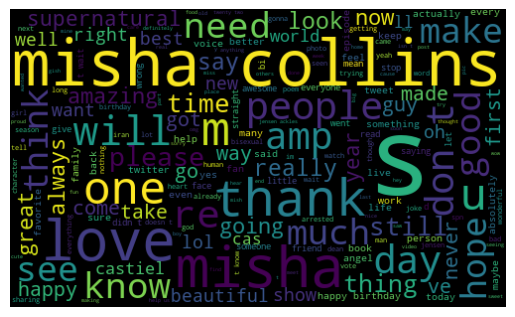

In [104]:
# Word cloud visualization.
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([text for text in df_tweets['preprocessed']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('mishacollins_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
pd.to_datetime(df_tweets['timestamp_ms'], unit='ms')

4      2021-11-01 03:20:34.658
5      2021-11-01 03:20:48.665
6      2021-11-01 03:23:05.666
8      2021-11-01 03:27:47.657
11     2021-11-01 03:46:13.663
                 ...          
8682   2022-11-21 14:03:13.660
8683   2022-11-21 14:19:40.661
8684   2022-11-21 16:05:37.658
8688   2022-11-22 18:02:34.664
8690   2022-11-22 22:01:25.658
Name: timestamp_ms, Length: 2272, dtype: datetime64[ns]

In [121]:
df_timeSA = df_tweets[['timestamp_ms', 'compound']]

In [122]:
df_timeSA['timestamp_ms'] = pd.to_datetime(df_timeSA['timestamp_ms'], unit='ms')

C:\Users\Juliet\AppData\Local\Temp\ipykernel_11032\1732158251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeSA['timestamp_ms'] = pd.to_datetime(df_timeSA['timestamp_ms'], unit='ms')


In [123]:
df_timeSA

,timestamp_ms,compound
4,2021-11-01 03:20:34.658,0.0000
5,2021-11-01 03:20:48.665,0.4404
6,2021-11-01 03:23:05.666,0.0000
8,2021-11-01 03:27:47.657,-0.4767
11,2021-11-01 03:46:13.663,0.3182
...,...,...
8682,2022-11-21 14:03:13.660,0.4019
8683,2022-11-21 14:19:40.661,0.0772
8684,2022-11-21 16:05:37.658,0.7096
8688,2022-11-22 18:02:34.664,0.4588


In [125]:
df_timeSA['timestamp_ms'].dt.date.value_counts().sort_index()

2021-11-01    16
2021-11-02     4
2021-11-03     4
2021-11-04     9
2021-11-05     9
              ..
2022-11-18    14
2022-11-19     3
2022-11-20    15
2022-11-21     4
2022-11-22     2
Name: timestamp_ms, Length: 374, dtype: int64

In [126]:
df_daily = df_timeSA.set_index('timestamp_ms').resample('D')['compound'].mean()

In [127]:
df_daily #pandas series resampled by day, taking the average sentiment of the day (mean of compound score)

timestamp_ms
2021-11-01    0.246906
2021-11-02    0.549575
2021-11-03    0.163525
2021-11-04    0.280778
2021-11-05    0.205844
                ...   
2022-11-18    0.292029
2022-11-19    0.402933
2022-11-20    0.232893
2022-11-21    0.387475
2022-11-22    0.229400
Freq: D, Name: compound, Length: 387, dtype: float64

In [131]:
df_daily = pd.concat([df_daily, df_timeSA['timestamp_ms'].dt.floor('d').value_counts().sort_index()], axis=1)
df_daily

,compound,timestamp_ms
2021-11-01,0.246906,16.0
2021-11-02,0.549575,4.0
2021-11-03,0.163525,4.0
2021-11-04,0.280778,9.0
2021-11-05,0.205844,9.0
...,...,...
2022-11-18,0.292029,14.0
2022-11-19,0.402933,3.0
2022-11-20,0.232893,15.0
2022-11-21,0.387475,4.0


In [132]:
df_daily.rename(columns={'timestamp_ms':'count'}, inplace=True)
df_daily

,compound,count
2021-11-01,0.246906,16.0
2021-11-02,0.549575,4.0
2021-11-03,0.163525,4.0
2021-11-04,0.280778,9.0
2021-11-05,0.205844,9.0
...,...,...
2022-11-18,0.292029,14.0
2022-11-19,0.402933,3.0
2022-11-20,0.232893,15.0
2022-11-21,0.387475,4.0


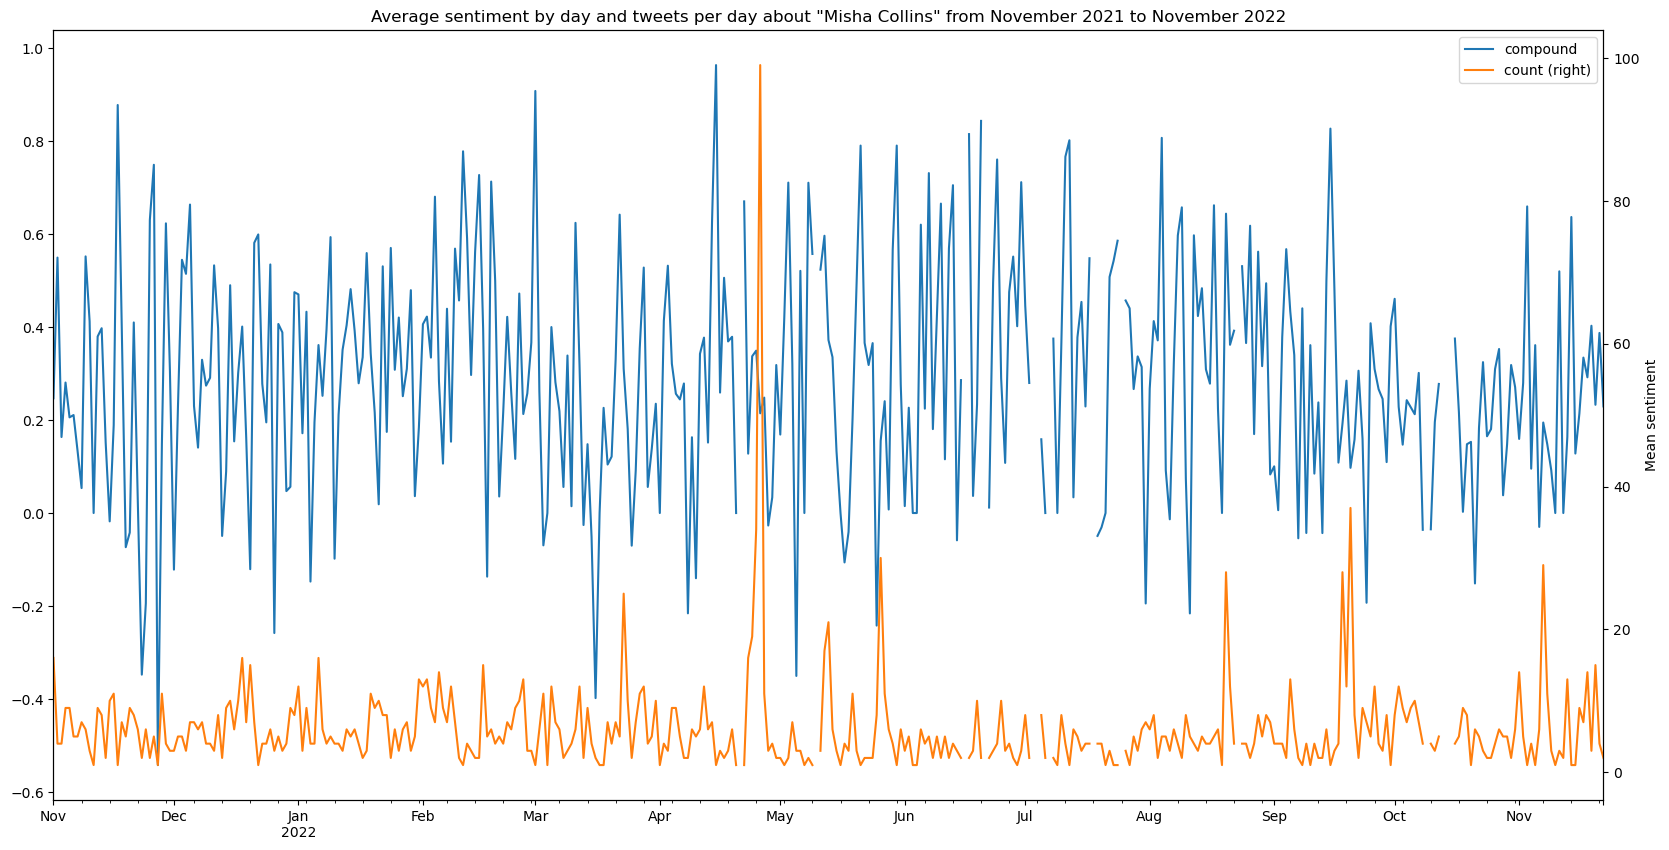

In [148]:
fig, ax = plt.subplots(figsize=(20,10)) 
df_daily.plot(y='compound', ax=ax) #this is a plot of average sentiment by day. Very noisy. Will resample by week.
df_daily.plot(y='count', ax=ax, secondary_y = True)
plt.xlabel('Date')
plt.ylabel('Mean sentiment')
plt.title('Average sentiment by day and tweets per day about "Misha Collins" from November 2021 to November 2022')
plt.savefig('daily_tweet_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

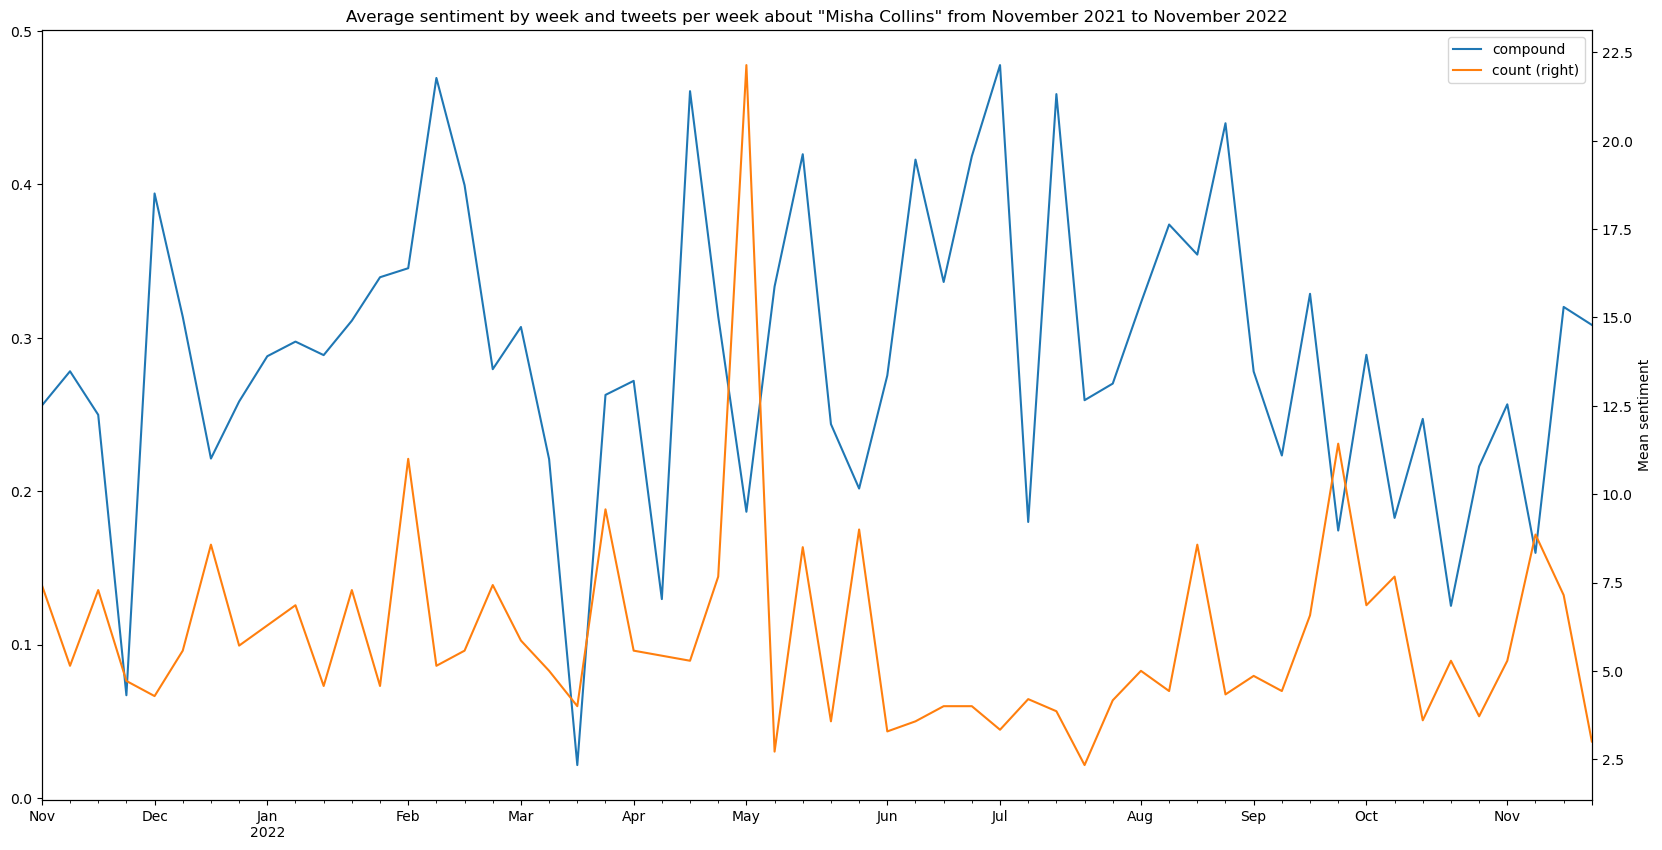

In [149]:
fig, ax = plt.subplots(figsize=(20,10)) 
df_daily.resample('W').mean().plot(y='compound', ax=ax) #this is a plot of average sentiment by day. Very noisy. Will resample by week.
df_daily.resample('W').mean().plot(y='count', ax=ax, secondary_y = True)
plt.xlabel('Date')
plt.ylabel('Mean sentiment')
plt.title('Average sentiment by week and tweets per week about "Misha Collins" from November 2021 to November 2022')
plt.savefig('weekly_tweet_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

In [147]:
df_daily.to_csv('daily_sentiment.csv')